In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./ML471_S1_Datafile_Concept.csv")

# Convert Date column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

y = df['Consumption']
window = 12

df['SMA'] = y.rolling(window=window).mean()

weights = np.arange(1, window + 1)
df['WMA'] = y.rolling(window=window).apply(
    lambda x: np.dot(x, weights) / weights.sum(),
    raw=True
)

df['EMA'] = y.ewm(span=window, adjust=False).mean()

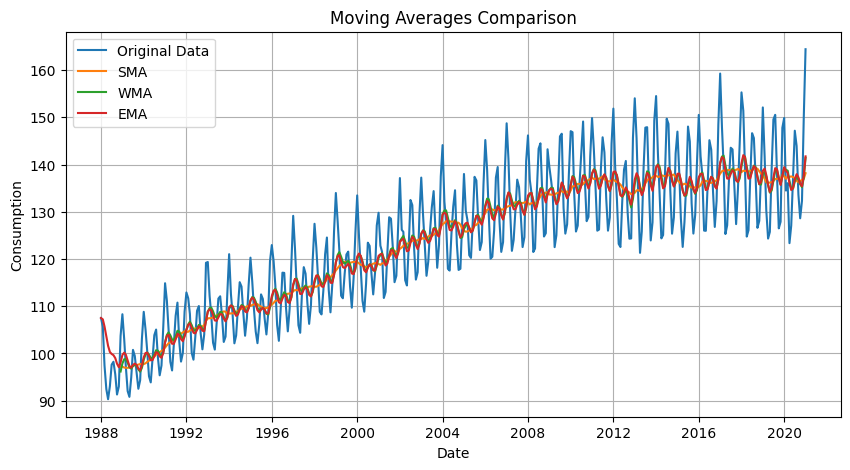

In [2]:
# Plot using Date column
plt.figure(figsize=(10,5))
plt.plot(df['DATE'], df['Consumption'], label='Original Data')
plt.plot(df['DATE'], df['SMA'], label='SMA')
plt.plot(df['DATE'], df['WMA'], label='WMA')
plt.plot(df['DATE'], df['EMA'], label='EMA')

plt.title("Moving Averages Comparison")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.show()